<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-21-5ee42293dedd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde = True)


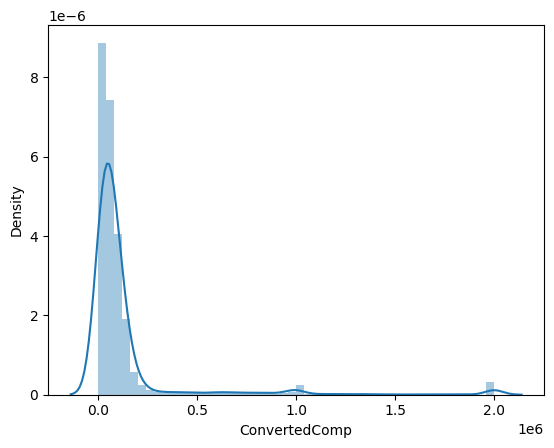

In [21]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
import piplite
await piplite.install(['seaborn'])
import seaborn as sns
sns.distplot(df['ConvertedComp'], kde = True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


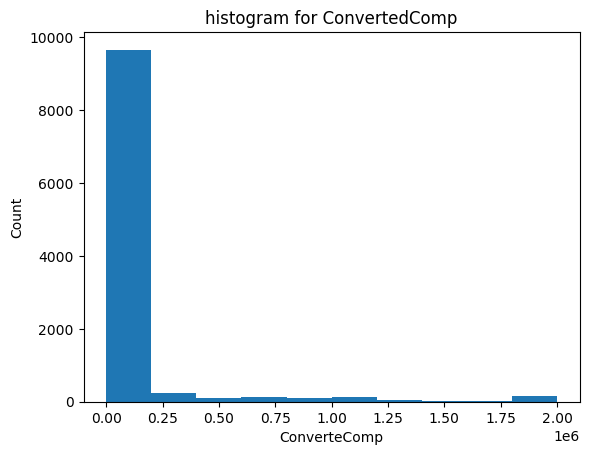

In [8]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')
plt.title('histogram for ConvertedComp')
plt.xlabel('ConverteComp')
plt.ylabel('Count')
plt.show()

What is the median of the column `ConvertedComp`?


In [42]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()
df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
df['Age'].describe().loc[['min', '25%', 'mean', '75%', 'max']]

min     16.000000
25%     25.000000
mean    30.778895
75%     35.000000
max     99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


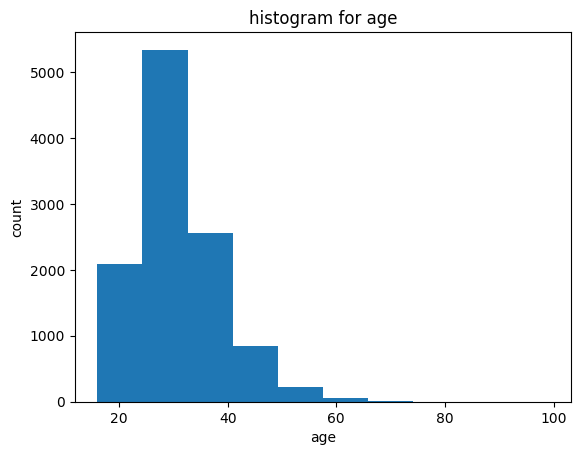

In [18]:
# your code goes here
df['Age'].plot(kind='hist')
plt.title('histogram for age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


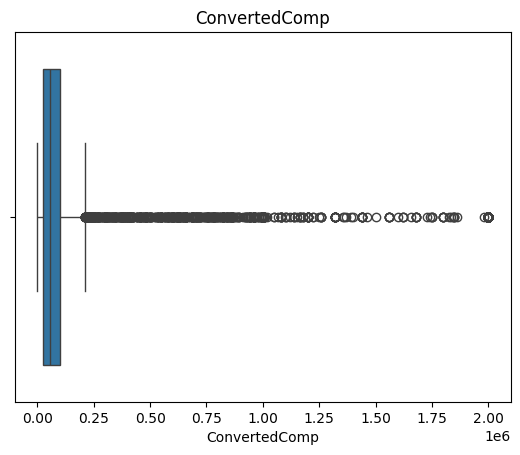

In [62]:
# your code goes here

sns.boxplot(x=df['ConvertedComp'])

plt.title('ConvertedComp')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)

Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

IQR

73132.0

Find out the upper and lower bounds.


In [26]:
# your code goes here
lower = Q1 - 1.5 * IQR

upper = Q3 + 1.5 * IQR
print(lower)
print(upper)

-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
# your code goes here
print(((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum()) 

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [59]:
# your code goes here
df1= df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]  
df1['ConvertedComp'].median() 


52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [33]:
# your code goes here
df.corr()['Age']

<ipython-input-33-bead62608471>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age']


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
